In [1]:
# Import needed packages and define rootpath
import os
import sys
import pandas as pd
import glob
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

root_path = os.path.abspath(os.path.join('../..')) # <- adjust such that root_path always points at the root project dir (i.e. if current file is two folders deep, use '../..'). 
if root_path not in sys.path:
    sys.path.append(root_path)


In [2]:
# Get sweep_results for desired features/hyperparamter/metrics from desired coarse tuning
pkl_files = glob.glob(os.path.join(root_path, "models", "trad_ml", "sweep_results","rf_model_dif", "*.pkl"))

accuracy_dif = []
for file in pkl_files:
    with open(file, 'rb') as f:
        obj = pkl.load(f)
        file_name = os.path.basename(file)  # Get only the file name from the path
        file_name_without_ext = os.path.splitext(file_name)[0]  # Remove the file extension
        shortened_file_name = file_name_without_ext[:-16]  # Remove the last 6 characters
        accuracy_dif.append({
            'Difference': obj['model_config']['dif'],
            'Accuracy': obj['metrics']['accuracy'],
            'Log Loss': obj['metrics']['lnloss'],
        })

df = pd.DataFrame(accuracy_dif)

print(df)

    Difference  Accuracy  Log Loss
0        False  0.507422  1.020634
1        False  0.503573  1.019742
2        False  0.497526  1.024002
3        False  0.508521  1.020474
4        False  0.512919  1.019589
5        False  0.511270  1.017010
6        False  0.513469  1.016489
7         True  0.495877  1.029900
8         True  0.503573  1.030243
9         True  0.489280  1.037276
10        True  0.509621  1.023315
11        True  0.494777  1.030494
12        True  0.498076  1.027839
13        True  0.500825  1.025355
14        True  0.511270  1.025370
15        True  0.505772  1.020914
16       False  0.510170  1.020767
17       False  0.498626  1.030008
18       False  0.499175  1.026170
19       False  0.492578  1.027407
20       False  0.502474  1.026363
21        True  0.506322  1.024427
22       False  0.499175  1.024782
23       False  0.504673  1.024026
24       False  0.501374  1.024655
25        True  0.505223  1.016872
26        True  0.504673  1.025829
27        True  0.51

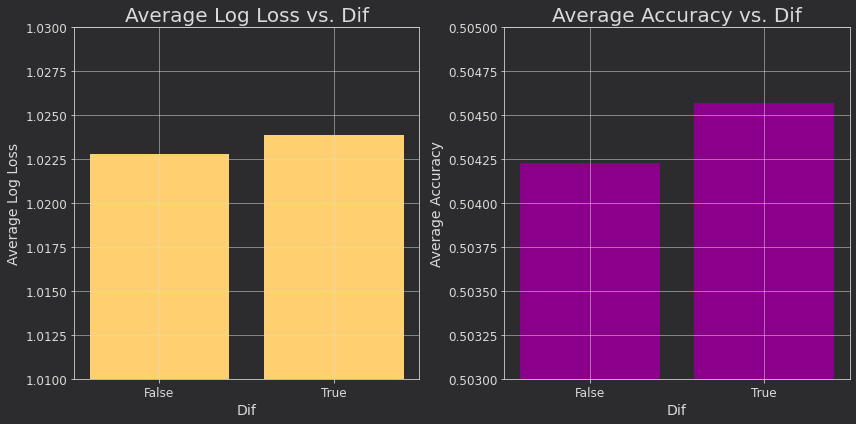

In [12]:
#Plot
# Group the DataFrame by 'Difference' and calculate the average of 'Log Loss' and 'Accuracy' for each group
grouped_df = df.groupby('Difference').mean().reset_index()

# Define the colors
log_loss_color = (255/255, 208/255, 112/255)  # Gold with transparency
accuracy_color = (139/255, 0/255, 139/255)   # Purple with transparency
label_color = (218/255, 218/255, 218/255)          # Light grey
grid_color = (218/255, 218/255, 218/255)           # Light grey
background_color = (44/255, 44/255, 46/255)        # Dark grey
legend_color = (169/255, 169/255, 169/255)         # grey

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Set the background color of the plot (entire figure)
fig.set_facecolor(background_color)

# Plot the average 'Log Loss' against 'Dif' in the first subplot
axes[0].bar(grouped_df['Difference'].astype(str), grouped_df['Log Loss'], label='Average Log Loss', color=log_loss_color)
axes[0].set_xlabel('Dif', color=label_color, fontsize = 14)
axes[0].set_ylabel('Average Log Loss', color=label_color, fontsize=14)
axes[0].set_ylim(1.01, 1.03)
axes[0].set_title('Average Log Loss vs. Dif', color=label_color, fontsize= 20)
axes[0].grid(True, color=grid_color, linestyle='-', linewidth=0.5)
axes[0].tick_params(axis='x', colors=label_color, labelsize = 12)
axes[0].tick_params(axis='y', colors=label_color, labelsize = 12)
axes[0].spines['top'].set_color(label_color)
axes[0].spines['bottom'].set_color(label_color)
axes[0].spines['left'].set_color(label_color)
axes[0].spines['right'].set_color(label_color)

# Set the facecolor for the first subplot
axes[0].set_facecolor(background_color)

# Plot the average 'Accuracy' against 'Dif' in the second subplot
axes[1].bar(grouped_df['Difference'].astype(str), grouped_df['Accuracy'], label='Average Log Loss', color=accuracy_color)
axes[1].set_xlabel('Dif', color=label_color, fontsize = 14)
axes[1].set_ylabel('Average Accuracy', color=label_color, fontsize = 14)
axes[1].set_ylim(0.5030, 0.5050)
axes[1].set_title('Average Accuracy vs. Dif', color=label_color, fontsize= 20)
axes[1].grid(True, color=grid_color, linestyle='-', linewidth=0.5)
axes[1].tick_params(axis='x', colors=label_color, labelsize = 12)
axes[1].tick_params(axis='y', colors=label_color, labelsize = 12)
axes[1].spines['top'].set_color(label_color)
axes[1].spines['bottom'].set_color(label_color)
axes[1].spines['left'].set_color(label_color)
axes[1].spines['right'].set_color(label_color)

# Set the facecolor for the second subplot
axes[1].set_facecolor(background_color)

plt.tight_layout()  # Adjust spacing between subplots

# Save the plot 
plt.savefig("optimization_dif_plot.png", dpi=300, bbox_inches="tight")

plt.show()